In [ ]:
!unzip brazillian_ecommerce.zip

Archive:  brazillian_ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [ ]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifetimes
import datetime as dt
import seaborn as sns
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ModifiedBetaGeoFitter

In [ ]:
df1 = pd.read_csv('olist_orders_dataset.csv')
df2 = pd.read_csv('olist_customers_dataset.csv')
df3 = pd.read_csv('olist_order_payments_dataset.csv')

In [ ]:
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
df3.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
orders = df1[['customer_id', 'order_id', 'order_purchase_timestamp']]
orders = orders.set_index('customer_id')
orders.drop_duplicates(inplace=True)
orders.head()

,order_id,order_purchase_timestamp
customer_id,,
9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [ ]:
customers = df2[['customer_id', 'customer_unique_id']]
customers = customers.set_index('customer_id')

elog = pd.concat([orders, customers], axis=1, join='inner')
elog.reset_index(inplace=True)
elog.head()

,customer_id,order_id,order_purchase_timestamp,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


In [ ]:
elog = elog[['customer_unique_id', 'order_purchase_timestamp']]
elog['order_purchase_timestamp'] = pd.to_datetime(elog['order_purchase_timestamp'])
elog['order_date'] = elog.order_purchase_timestamp.dt.date
elog['order_date'] = pd.to_datetime(elog['order_date'])
elog.drop('order_purchase_timestamp', axis=1, inplace=True)
elog.head()

,customer_unique_id,order_date
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02
1,af07308b275d755c9edb36a90c618231,2018-07-24
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13


In [ ]:
elog2 = pd.concat([orders, customers], axis=1, join='inner')
elog2.reset_index(inplace=True)
elog2.shape

(99441, 4)

In [ ]:
payment = df3[['order_id', 'payment_value']]
payment = payment.set_index('order_id')
payment.drop_duplicates(inplace=True)
payment.head()

,payment_value
order_id,
b81ef226f3fe1789b1e8b2acac839d17,99.33
a9810da82917af2d9aefd1278f1dcfa0,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,65.71
ba78997921bbcdc1373bb41e913ab953,107.78
42fdf880ba16b47b59251dd489d4441a,128.45


In [ ]:
elog2 = elog2.set_index('order_id')
elog3 = elog2.join(payment, how='inner')
elog3.reset_index(inplace=True)
elog3.shape

(29077, 5)

In [ ]:
elog3['order_purchase_timestamp'] = pd.to_datetime(elog3['order_purchase_timestamp'])
elog3['order_date'] = elog3.order_purchase_timestamp.dt.date
elog3['order_date'] = pd.to_datetime(elog3['order_date'])
elog3.drop('order_purchase_timestamp', axis=1, inplace=True)

In [ ]:
elog.describe()

,order_date
count,99441
mean,2017-12-30 17:26:56.616888320
min,2016-09-04 00:00:00
25%,2017-09-12 00:00:00
50%,2018-01-18 00:00:00
75%,2018-05-04 00:00:00
max,2018-10-17 00:00:00


In [ ]:
calibration_period_ends = '2018-06-30'
summary_cal_holdout = calibration_and_holdout_data(elog,
                                                   customer_id_col = 'customer_unique_id',
                                                   datetime_col = 'order_date',
                                                   freq = 'D', #days
                                                   calibration_period_end=calibration_period_ends,
                                                   observation_period_end='2018-10-17')

In [ ]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,51.0,0.0,109.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,54.0,0.0,109.0
0000f46a3911fa3c0805444483337064,0.0,0.0,477.0,0.0,109.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,261.0,0.0,109.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,228.0,0.0,109.0


In [ ]:
mbgnbd = ModifiedBetaGeoFitter(penalizer_coef=0.01)
mbgnbd.fit(summary_cal_holdout['frequency_cal'],
           summary_cal_holdout['recency_cal'],
           summary_cal_holdout['T_cal'],
           verbose=True)

Optimization terminated successfully.
         Current function value: 0.085065
         Iterations: 42
         Function evaluations: 43
         Gradient evaluations: 43


<lifetimes.ModifiedBetaGeoFitter: fitted with 83748 subjects, a: 0.22, alpha: 218.09, b: 0.12, r: 0.10>

In [76]:
mbgnbd.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.098302,0.008211,0.082209,0.114395
alpha,218.091663,10.763978,196.994267,239.189059
a,0.220101,0.021596,0.177773,0.262430
b,0.116176,0.012207,0.092251,0.140102


In [ ]:
t = 90 # days to predict in the future
summary_cal_holdout['predicted_purchases'] = mbgnbd.conditional_expected_number_of_purchases_up_to_time(t,
                                                                                      summary_cal_holdout['frequency_cal'],
                                                                                      summary_cal_holdout['recency_cal'],
                                                                                      summary_cal_holdout['T_cal'])

summary_cal_holdout['p_alive'] = mbgnbd.conditional_probability_alive(summary_cal_holdout['frequency_cal'],
                                                                         summary_cal_holdout['recency_cal'],
                                                                         summary_cal_holdout['T_cal'])
summary_cal_holdout['p_alive'] = np.round(summary_cal_holdout['p_alive'] / summary_cal_holdout['p_alive'].max(), 2)

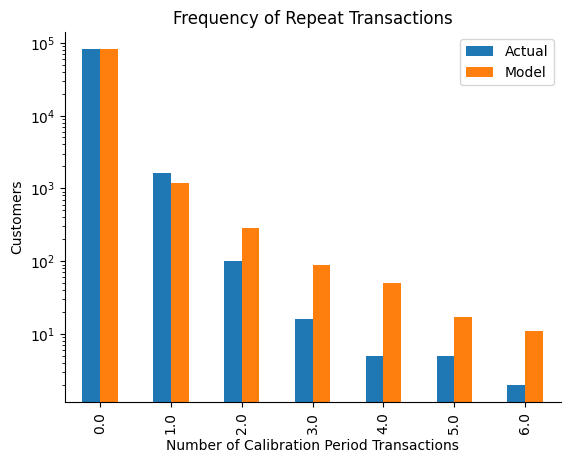

In [ ]:
from lifetimes.plotting import plot_period_transactions
ax = plot_period_transactions(mbgnbd, max_frequency=7)
ax.set_yscale('log')
sns.despine()

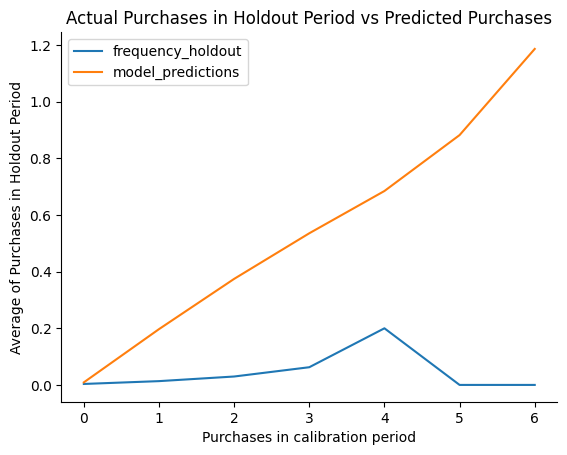

In [ ]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(mbgnbd, summary_cal_holdout)
sns.despine()

In [ ]:
elog.columns = ['CUSTOMER_ID', 'date']

from lifetimes.utils import expected_cumulative_transactions

t = (elog.date.max() - elog.date.min()).days
df = expected_cumulative_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t)

In [ ]:
df.head()

,actual,predicted
0,0,0.000156
1,0,0.000467
2,0,0.000778
3,0,0.001088
4,0,0.001399


In [ ]:
df.tail()

,actual,predicted
768,2383,3875.186570
769,2383,3888.104262
770,2383,3901.016511
771,2383,3913.923334
772,2384,3926.824743


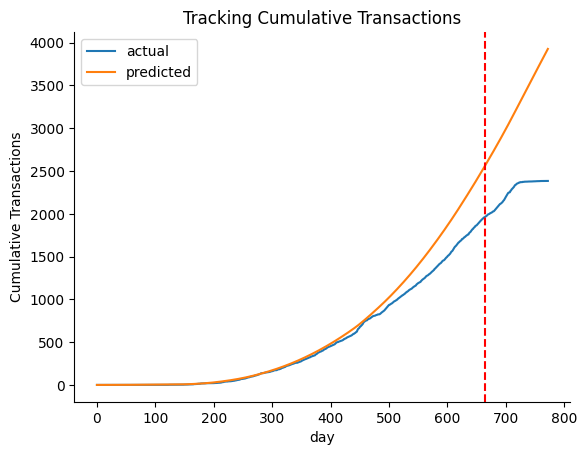

In [ ]:
from datetime import datetime

cal = datetime.strptime('2018-06-30', '%Y-%m-%d')

from lifetimes.plotting import plot_cumulative_transactions
t = (elog.date.max() - elog.date.min()).days
t_cal = (cal - elog.date.min()).days
plot_cumulative_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()

CPU times: user 4.78 s, sys: 56.4 ms, total: 4.84 s
Wall time: 6.44 s


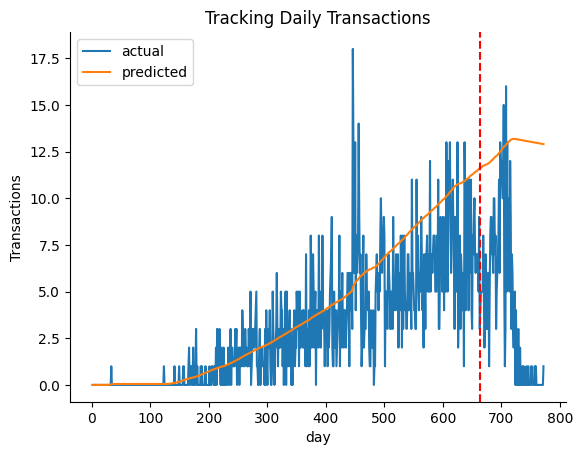

In [ ]:
%%time

from lifetimes.plotting import plot_incremental_transactions
plot_incremental_transactions(mbgnbd, elog, 'date', 'CUSTOMER_ID', t, t_cal, freq='D')
sns.despine()

# Gamma - Gamma model

In [ ]:
elog3 = elog3[['order_date', 'payment_value', 'customer_unique_id']]
elog3.head()

,order_date,payment_value,customer_unique_id
0,2017-04-26,259.83,eb28e67c4c0b83846050ddfb8a35d051
1,2018-01-14,216.87,3818d81c6709e39d06b2738a8d3a2474
2,2018-07-04,880.75,fda4476abb6307ab3c415b7e6d026526
3,2018-03-07,164.39,1a6cbc34ea404cb0af7ed74df0999354
4,2018-01-16,315.33,02daaa0e021d624d1784c4ea5cc84ace


In [ ]:
elog3.describe()

,order_date,payment_value
count,29077,29077.000000
mean,2018-01-03 05:36:10.003782912,267.344813
min,2016-10-02 00:00:00,0.000000
25%,2017-09-08 00:00:00,85.080000
50%,2018-02-01 00:00:00,172.050000
75%,2018-05-14 00:00:00,312.880000
max,2018-10-17 00:00:00,13664.080000
std,NaN,351.908167


In [ ]:
calibration_period_ends = '2018-06-30'
summary_cal_holdout2 = calibration_and_holdout_data(elog3,
                                                   customer_id_col = 'customer_unique_id',
                                                   datetime_col = 'order_date',
                                                   monetary_value_col = 'payment_value',
                                                   freq = 'D', #days
                                                   calibration_period_end=calibration_period_ends,
                                                   observation_period_end='2018-10-17')

In [ ]:
summary_cal_holdout2.head()

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
customer_unique_id,,,,,,,
0000f46a3911fa3c0805444483337064,0.0,0.0,477.0,0.0,0.0,0.0,109.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,228.0,0.0,0.0,0.0,109.0
0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,86.0,0.0,0.0,0.0,109.0
00053a61a98854899e70ed204dd4bafe,0.0,0.0,122.0,0.0,0.0,0.0,109.0
0005e1862207bf6ccc02e4228effd9a0,0.0,0.0,483.0,0.0,0.0,0.0,109.0


In [ ]:
returning_customers_summary = summary_cal_holdout2[summary_cal_holdout2['frequency_cal'] > 0]
returning_customers_summary[['monetary_value_cal', 'frequency_cal']].corr()

,monetary_value_cal,frequency_cal
monetary_value_cal,1.000000,0.093987
frequency_cal,0.093987,1.000000


In [ ]:
from lifetimes import GammaGammaFitter

returning_customers_summary = returning_customers_summary[returning_customers_summary['monetary_value_cal'] > 0]
gg = GammaGammaFitter(penalizer_coef = 0.01)
gg.fit(returning_customers_summary['frequency_cal'],
       returning_customers_summary['monetary_value_cal'],
      verbose=True)

Optimization terminated successfully.
         Current function value: 7.394723
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12


<lifetimes.GammaGammaFitter: fitted with 194 subjects, p: 3.80, q: 0.39, v: 3.54>

In [77]:
gg.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,3.795746,0.351959,3.105906,4.485587
q,0.394732,0.032808,0.330427,0.459036
v,3.542182,0.358586,2.839354,4.245009


In [ ]:
print("Expected conditional average revenue: €%s, Average revenue: €%s" % (
   np.round(gg.conditional_expected_average_profit(
       returning_customers_summary['frequency_cal'],
       returning_customers_summary['monetary_value_cal']
   ).mean(), 2),
   np.round(returning_customers_summary[returning_customers_summary['frequency_cal']>0]['monetary_value_cal'].mean(), 2)
))

Expected conditional average revenue: €312.97, Average revenue: €261.68
